/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:180: RuntimeWarning: Mean of empty slice
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: 
The deden

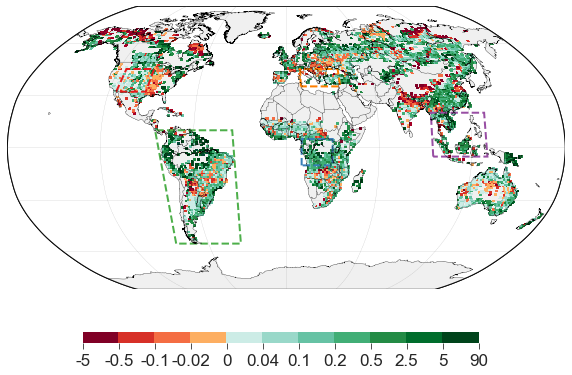

In [7]:
#!/usr/bin/env python
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import sys
import pandas as pd
import matplotlib as mpl
from netCDF4 import Dataset
from matplotlib import cm
from mpl_toolkits.basemap import Basemap, cm, maskoceans
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.style.use('seaborn-ticks')

title_size  = 20
marker_size = 7
stepsize    = 0.01
label_size  = 9
border_size = 0.4
tick_size   = 9
legend_size = 9
line_width  = 1.0
rotation    =45
text_size   =8
alpha       = 0.25
border_width= 0.0

#### plot
figure_width=10
figure_length=6
figure_rows = 1
figure_cols = 1
subplot_ratio=1

glat, glon = (159,288)
nlat,nlong=159,288
beglat=-60.78534
endlat=88.11518
beglong=-180
endlong=180
lats = np.linspace(beglat,endlat, glat)
lons = np.linspace(beglong,endlong, glon)

def roller(data):
    datas = np.zeros((192,288))
    datas[:,:144] = data[:,144:]
    datas[:,144:]= data[:,:144]
    datas[datas>1e35]=np.nan
    return datas

### read netcdf data
def read_data(fname,var):
    pt=Dataset(fname, 'r')
    data=pt.variables[var]
    data=np.array(data)
    return data

### mask missing values
def mask_data(data,missVal):
    data=np.where(data==missVal, np.nan,data)
    data=np.where(data>1e35, np.nan,data)
    return data

def fillmissing_lucc(data):
    data=np.where(data>=1.00001, np.nan,data)
    data=np.where(data<0.0, np.nan,data)
    return data

### fill missing values
def fill_missingVal(data,missVal):
    data=np.where(data>=missVal, np.nan,data)
    return data

def draw_screen_poly( lats, lons, m,color):
    from matplotlib.patches import Polygon
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor='none', edgecolor=color,alpha=1.0,linewidth=2.0,linestyle="--")
    plt.gca().add_patch(poly)
    
def plotmap(data,var):
    fig, ax = plt.subplots(figure_rows, figure_cols, figsize=(figure_width,figure_length))
    lon_0 = np.mean(lons)
    lat_0 = np.mean(lats)
    m = Basemap(projection='robin',lon_0=lon_0,lat_0=lat_0,\
                llcrnrlat=np.amin(lats),urcrnrlat=np.amax(lats),\
                llcrnrlon=np.amin(lons),urcrnrlon=np.amax(lons),\
                rsphere=6371200.,resolution='l',area_thresh=10000,ax=ax)
    linewidth=0.3
    m.drawcoastlines(color='k', linewidth=linewidth)
    m.drawcountries(color='k', linewidth=linewidth)
    m.drawmapboundary(fill_color='white', zorder=-1)
    m.fillcontinents(color='0.94', lake_color='white', zorder=0)
    
    m.drawparallels(np.arange(-60.,91.,30.), dashes=[1,1], linewidth=0.25, color='0.5')
    m.drawmeridians(np.arange(0., 360., 60.), dashes=[1,1], linewidth=0.25, color='0.5')
    
    regions = ["Central US", "EU",\
               "SEA","Africa","South America"]
    beglats = [32,35,\
               -5,-10,-55]
    endlats = [45,45,\
               20,5,10]
    beglons = [-115,10,\
               95,10,-85]
    endlons = [-95,37,\
               130,30,-35]
    colors = ["#e41a1c","#ff7f00","#984ea3",\
              "#377eb8","#4daf4a"]
    for lat_var_b, lat_var_e, lon_var_b, lon_var_e,color in zip(beglats,endlats,beglons,endlons,colors):
        lats_rec = [lat_var_b,lat_var_e,lat_var_e,lat_var_b]
        lons_rec = [lon_var_b,lon_var_b,lon_var_e,lon_var_e]
        draw_screen_poly( lats_rec, lons_rec, m ,color)
        
    markersize = 5

    cmap = plt.get_cmap('PRGn') #plt.cm.get_cmap("CA_10CD") # 
        
    viridisBig = plt.get_cmap('jet', 16)
    newcmp = ListedColormap(viridisBig(np.linspace(0.2, 0.4, 8)))
    mcolors = plt.cm.YlOrRd(np.linspace(0.2, 0.5, 8))
    cmap_custom = ListedColormap(mcolors)
    
    plotdata = np.vstack([m.transform_scalar(data[:, :], lons, lats, glon, glat).reshape(glat, glon)])
    lon = np.arange(-180, 180, 1.25)
    lat = np.arange(-90, 90, 0.94)
    lon, lat = np.meshgrid(lon, lat)
    lon, lat = m(lon, lat)
    
    from matplotlib import colors
    cpool = ["#a50026","#d73027","#f46d43","#fdae61",\
             "#ccece6","#99d8c9","#66c2a4","#41ae76","#238b45","#006d2c","#00441b"]
    cmap_sigl = colors.ListedColormap(cpool, 'sig_level')
    cmap_sigl.set_under('#800026', alpha=0.5)
    cmap_sigl.set_over('#014636')
    
    bnd_sigl = [-5,-0.5,-0.1,-0.02,0,0.04,0.1,0.2,0.5,2.5,5,90]
    bounds=["-5","-0.5","-0.1","-0.02","0","0.04","0.1","0.2","0.5","2.5","5","90"]
    norm_sigl = colors.BoundaryNorm(bnd_sigl, cmap_sigl.N)
    
    aSrc_land = maskoceans(lon, lat, data)
    
    cs = m.pcolormesh(lon, lat, aSrc_land,  vmin=vmin, vmax=vmax, \
                      norm=norm_sigl, cmap=cmap_sigl, \
                      rasterized=False, edgecolor='0.6', linewidth=0,alpha = 1.0)
    
    cbaxes = fig.add_axes([0.23, 0.05, 0.55, 0.027]) # X,Y position,length, wideth, 
    cbar = fig.colorbar(cs, cax=cbaxes, ticks=bnd_sigl, orientation='horizontal', extend='neither', \
                 spacing='uniform')
    cbar.set_ticklabels(bounds)
    cbar.ax.tick_params(labelsize=17)
    cbar.outline.set_linewidth(.0)
    mpl.rcParams['axes.linewidth'] = border_width #set the value globally
    mpl.rcParams['axes.edgecolor'] = "white" #set the value globally
    
    fig_dir = "../figures/"    
    fname=fig_dir+"Fig1c.pdf"
    fig.savefig(fname,format='pdf',bbox_inches='tight')
    
    return cs


def read_one_ensemble(caseid):
    fname=data_dir +var+"_SSP126Lu-REFOREST_"+caseid+"_2015_2100.nc"
    data = read_data(fname, "value")
    lastyrindex = -1
    data = data[lastyrindex,:,:]-data[0,:,:]
    data=fill_missingVal(data,1e36)
    data[data==0] = np.nan
    vegc=data/1000. #convert gC/m2 to kgC/m2
    return vegc

### read data and call plot
def sub_function():
    ensbase=np.empty((ens_size,192,288))
    for caseid,i in zip(["ensemble1","ensemble2","ensemble3"],np.arange(ens_size)):
        ensbase[i,:,:] = read_one_ensemble(caseid)
    vegc = np.nanmean(ensbase,axis=0)
        
    crop="forest"    
    fname=data_dir+crop+"_frac_2015_SSP126Lu-REFOREST.nc"
    firstyr_forest = read_data(fname, "biofrac") * 100.
    fname=data_dir+crop+"_frac_2100_SSP126Lu-REFOREST.nc"
    lastyr_forest = read_data(fname, "biofrac") * 100.
    
    forestfrac=lastyr_forest-firstyr_forest
    forestfrac=np.where(forestfrac<=0.1, np.nan,forestfrac)
    
    ### do not consider deforestation
    vegc = np.where(forestfrac<=0.1, np.nan,vegc)
    
    data = vegc/forestfrac

    cs = plotmap(data,var)    
    
    return data

data_dir= "../data/"

missVal=1e36
vmin=-2
vmax=50
step=.2

ens_size=3
yearstring="_86years"
var = "TOTECOSYSC"
data = sub_function()
